In [1]:
import pickle
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Single run

In [3]:
pickle_name = "./Results/Run39/Results_final_pickle.pkl"
# pickle_name = "./Results/Run23/Results29_pickle.pkl"

with open(pickle_name, 'rb') as handle:
    dict_data = pickle.load(handle)
df = pd.DataFrame.from_dict(dict_data)

In [4]:
df['ratio b1/n1'] = df['b1'] /df['n1'] 
df['ratio b2/n2'] = df['b2'] /df['n2'] 
df['ratio b3/n3'] = df['b3'] /df['n3'] 

df['Block size/Cache'] = df['b1']*df['b2']*df['b3']*4/11264000

df['cummax'] = df['Performance'].cummax()
# df.sort_values(['Performance'], ascending=[False],inplace=True)
df

,Epoch,Ant,Performance,init,n1,n2,n3,simd,Olevel,num_thread,b1,b2,b3,ratio b1/n1,ratio b2/n2,ratio b3/n3,Block size/Cache,cummax
0,0,0,1280.83,init,512,512,1024,avx2,-O2,16,512,32,128,1.00000,0.06250,0.125000,0.744727,1280.83
1,0,1,1220.96,init,512,512,1024,avx2,-Ofast,16,400,16,96,0.78125,0.03125,0.093750,0.218182,1280.83
2,0,2,1197.45,init,512,512,1024,avx,-O3,16,464,32,128,0.90625,0.06250,0.125000,0.674909,1280.83
3,0,3,1169.93,init,512,512,1024,avx,-Ofast,16,336,16,32,0.65625,0.03125,0.031250,0.061091,1280.83
4,0,4,1162.14,init,512,512,1024,avx2,-O2,16,272,16,16,0.53125,0.03125,0.015625,0.024727,1280.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7494,49,145,1176.71,init,512,512,1024,avx2,-O3,16,448,16,48,0.87500,0.03125,0.046875,0.122182,1565.94
7495,49,146,1173.67,init,512,512,1024,avx512,-O2,16,448,16,48,0.87500,0.03125,0.046875,0.122182,1565.94
7496,49,147,1160.99,init,512,512,1024,avx,-Ofast,16,448,16,208,0.87500,0.03125,0.203125,0.529455,1565.94
7497,49,148,1153.84,init,512,512,1024,avx512,-Ofast,16,448,16,128,0.87500,0.03125,0.125000,0.325818,1565.94


In [5]:
def pop_std(x):
    return x.std(ddof=0)

df_stat = df[['Epoch', 'Performance','cummax']].groupby(['Epoch'], as_index=True).agg({'Performance':['mean',pop_std,'min','max'],'cummax':'last'}).reset_index()
df_stat.columns = ['Epoch','Avg Performance', 'Std','min','max','cummax']


Text(0, 0.5, 'Throughput [MPoints/s]')

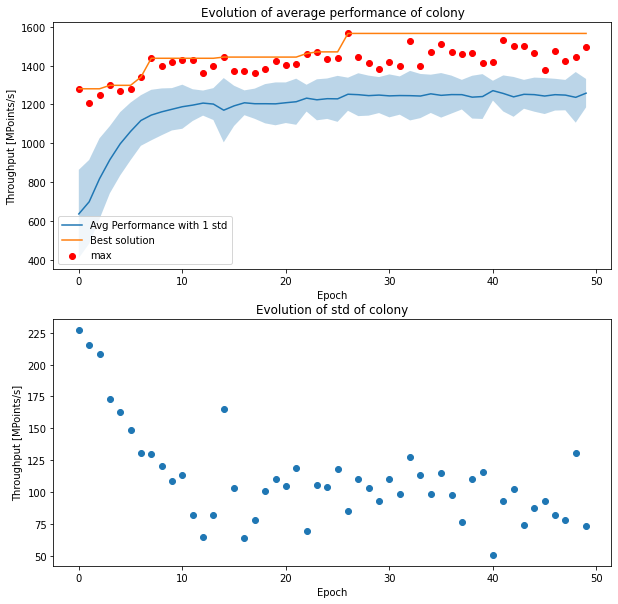

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(10, 10)
ax1.plot(df_stat['Epoch'], df_stat['Avg Performance'])
ax1.plot(df_stat['Epoch'], df_stat['cummax'])
ax1.scatter(df_stat['Epoch'], df_stat['max'], color = 'r')

# ax1.plot(df_stat['Epoch'], df_stat['min'], color = 'r')

ax1.fill_between(df_stat['Epoch'], df_stat['Avg Performance']-1*df_stat['Std'], df_stat['Avg Performance']+1*df_stat['Std'] ,alpha=0.3)
ax1.title.set_text('Evolution of average performance of colony')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Throughput [MPoints/s]')
ax1.legend(['Avg Performance with 1 std', 'Best solution','max'])


ax2.scatter(df_stat['Epoch'], df_stat['Std'])
ax2.title.set_text('Evolution of std of colony')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Throughput [MPoints/s]')




In [7]:
counter = 0
filename = "./Plots/Plot_evolution_{}.png"

In [8]:
while os.path.isfile(filename.format(counter)):
    counter += 1
filename = filename.format(counter)
fig.savefig(filename, dpi=100)


# *Multiple files*

## Imports

In [2]:
pickle_name = "Results_final_pickle.pkl"

import os
rootdir = os.getcwd() + '/Results'
list_dict_data = []
list_runs = []
for subdir, dirs, files in os.walk(rootdir):
    if 'Run' in subdir:
        path = os.path.join(subdir, pickle_name)
        run = os.path.basename(subdir)
        if os.path.isfile(path):
            with open(path, 'rb') as handle:
                dict_data_mult = pickle.load(handle)
            list_dict_data.append(dict_data_mult)
            list_runs.append(run)
            
# convert dict to dataframes
dataframes = [pd.DataFrame(d) for d in list_dict_data]
df_mult = pd.concat([df.assign(Run=key) for key, df in zip(list_runs, dataframes)])
        

In [3]:
df_mult['ratio b1/n1'] = df_mult['b1'] /df_mult['n1'] 
df_mult['ratio b2/n2'] = df_mult['b2'] /df_mult['n2'] 
df_mult['ratio b3/n3'] = df_mult['b3'] /df_mult['n3'] 
df_mult['Problem size'] = df_mult['n1']*df_mult['n2']*df_mult['n3']

df_mult['Block size/Cache'] = df_mult['b1']*df_mult['b2']*df_mult['b3']*4/11264000

df_mult['cummax'] = df_mult.groupby(['Run'])['Performance'].agg(['cummax'])
df_mult.sort_values(['Performance'], ascending=[False],inplace=True)
# df_mult.loc[df_mult['Run'] == 'Run39']


In [21]:
df_mult

,Epoch,Ant,Performance,init,n1,n2,n3,simd,Olevel,num_thread,b1,b2,b3,Run,ratio b1/n1,ratio b2/n2,ratio b3/n3,Problem size,Block size/Cache,cummax
599,5,0.0,2057.32,init,288,992,896,avx512,-O2,16,384,24,158,Run0,1.333333,0.024194,0.176339,255983616,0.517091,2057.32
1559,13,0.0,1981.69,init,320,864,800,avx512,-Ofast,16,384,17,179,Run28,1.200000,0.019676,0.223750,221184000,0.414955,1981.69
1079,9,0.0,1938.24,init,384,800,960,avx,-O3,16,384,16,201,Run24,1.000000,0.020000,0.209375,294912000,0.438545,1938.24
479,4,0.0,1924.05,init,416,960,992,avx2,-Ofast,16,416,14,172,Run12,1.000000,0.014583,0.173387,396165120,0.355727,1924.05
1199,10,0.0,1899.10,init,352,832,928,avx,-Ofast,16,384,17,238,Run8,1.090909,0.020433,0.256466,271777792,0.551727,1899.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,3,39.0,314.66,init,512,512,512,avx2,-Ofast,16,112,432,32,Run38,0.218750,0.843750,0.062500,134217728,0.549818,1095.03
77,1,38.0,314.40,init,512,512,512,avx512,-O3,16,64,448,80,Run38,0.125000,0.875000,0.156250,134217728,0.814545,1044.18
598,0,598.0,308.45,init,512,512,1024,avx2,-O3,16,32,256,256,Run40,0.062500,0.500000,0.250000,268435456,0.744727,1349.65
1198,0,1198.0,296.70,init,512,512,1024,avx2,-O3,16,64,512,64,Run41,0.125000,1.000000,0.062500,268435456,0.744727,1479.07


## Parameters for plot

In [154]:
head = 100
df_ratio = df_mult.head(head)[['Performance', 'ratio b1/n1', 'ratio b2/n2','ratio b3/n3']]
df_simd = df_mult.head(head)[['Performance', 'simd']].groupby('simd').agg({'Performance': ['mean', 'std']}).reset_index()
df_simd.columns = ['simd', 'mean', 'std']
df_olevel = df_mult.head(head)[['Performance', 'Olevel']].groupby('Olevel').agg({'Performance': ['mean', 'std']}).reset_index()
df_olevel.columns = ['Olevel', 'mean', 'std']
df_block = df_mult.tail(head)[['Performance', 'Block size/Cache']]


In [142]:
df_simd2 = df_mult.head(head)[['Performance', 'simd']]
# df_simd2
df_ratio

,Performance,ratio b1/n1,ratio b2/n2,ratio b3/n3
599,2057.32,1.333333,0.024194,0.176339
1559,1981.69,1.200000,0.019676,0.223750
1079,1938.24,1.000000,0.020000,0.209375
479,1924.05,1.000000,0.014583,0.173387
1199,1899.10,1.090909,0.020433,0.256466
...,...,...,...,...
119,1740.44,1.666667,0.018319,0.179167
1199,1739.47,1.300000,0.018750,0.169355
119,1739.03,1.071429,0.020433,0.165509
1200,1738.74,1.000000,0.016927,0.155208


## Ratio b1/n1

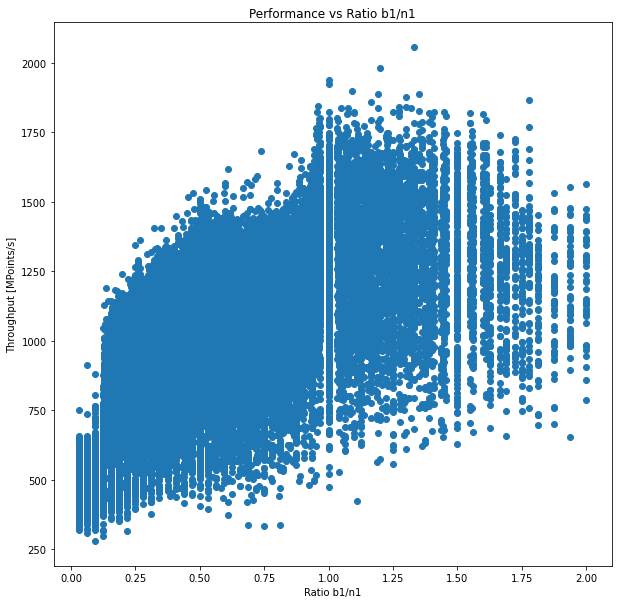

In [23]:
fig_ratio1 = plt.figure(figsize= (10,10))
plt.scatter(df_ratio['ratio b1/n1'], df_ratio['Performance'])
plt.xlabel('Ratio b1/n1')
plt.ylabel('Throughput [MPoints/s]')
plt.title('Performance vs Ratio b1/n1')

counter = 0
filename_ratio1 = "./Plots/Plot_Performance_Ratio_1_{}.png"


In [8]:
while os.path.isfile(filename_ratio1.format(counter)):
    counter += 1
filename_ratio1 = filename_ratio1.format(counter)
fig_ratio1.savefig(filename_ratio1, dpi=100)


## Ratio b2/n2

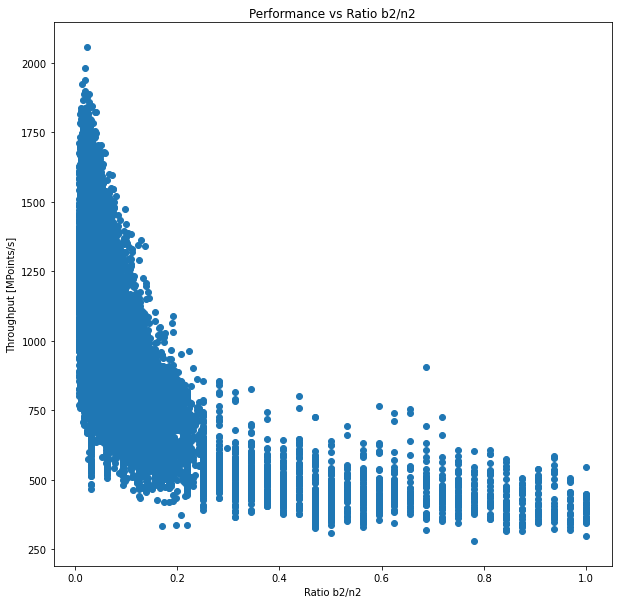

In [24]:
fig_ratio2 = plt.figure(figsize= (10,10))
plt.scatter(df_ratio['ratio b2/n2'], df_ratio['Performance'])
plt.xlabel('Ratio b2/n2')
plt.ylabel('Throughput [MPoints/s]')
plt.title('Performance vs Ratio b2/n2')

counter = 0
filename_ratio2 = "./Plots/Plot_Performance_Ratio_2_{}.png"


In [ ]:
while os.path.isfile(filename_ratio2.format(counter)):
    counter += 1
filename_ratio2 = filename_ratio2.format(counter)
fig_ratio2.savefig(filename_ratio2, dpi=100)


## Ratio b3/n3

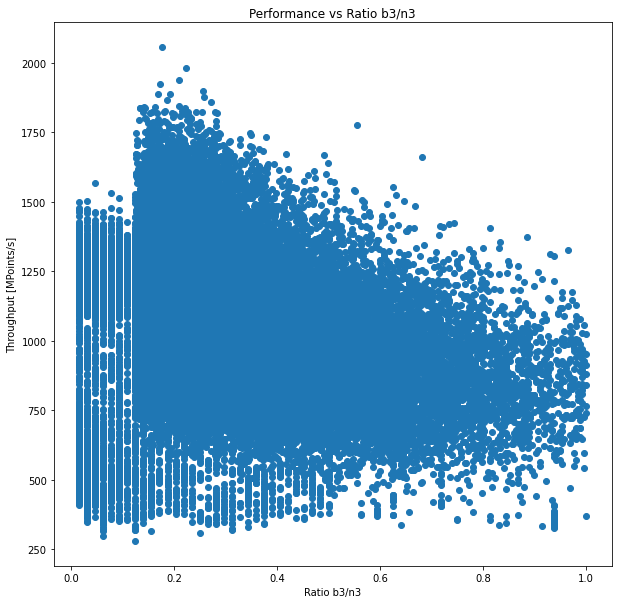

In [25]:
fig_ratio3 = plt.figure(figsize= (10,10))

plt.scatter(df_ratio['ratio b3/n3'], df_ratio['Performance'])
plt.xlabel('Ratio b3/n3')
plt.ylabel('Throughput [MPoints/s]')
plt.title('Performance vs Ratio b3/n3')

counter = 0
filename_ratio3 = "./Plots/Plot_Performance_Ratio_3_{}.png"


In [21]:
while os.path.isfile(filename_ratio3.format(counter)):
    counter += 1
filename_ratio3 = filename_ratio3.format(counter)
fig_ratio3.savefig(filename_ratio3, dpi=100)


## Ratio all

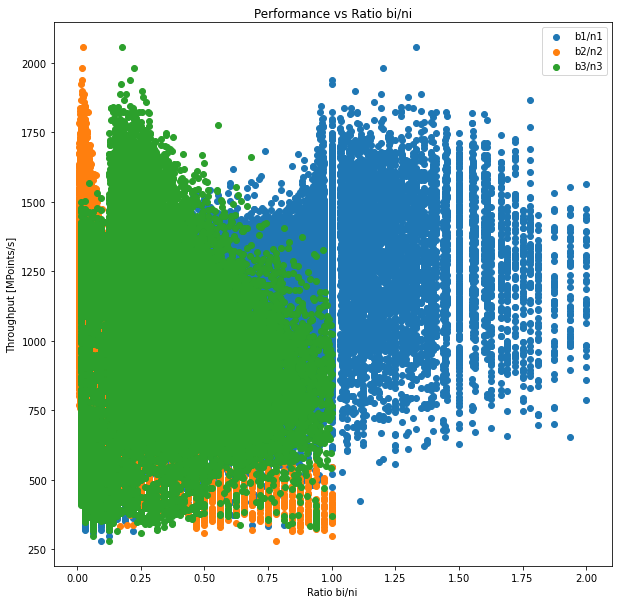

In [26]:
fig_ratioall = plt.figure(figsize= (10,10))

plt.scatter(df_ratio['ratio b1/n1'], df_ratio['Performance'])
plt.scatter(df_ratio['ratio b2/n2'], df_ratio['Performance'])
plt.scatter(df_ratio['ratio b3/n3'], df_ratio['Performance'])
plt.xlabel('Ratio bi/ni')
plt.ylabel('Throughput [MPoints/s]')
plt.title('Performance vs Ratio bi/ni')
plt.legend(['b1/n1', 'b2/n2', 'b3/n3'])

counter = 0
filename_ratioall = "./Plots/Plot_Performance_Ratio_all_{}.png"


In [ ]:
while os.path.isfile(filename_ratioall.format(counter)):
    counter += 1
filename_ratioall = filename_ratioall.format(counter)
fig_ratioall.savefig(filename_ratioall, dpi=100)


## SIMD

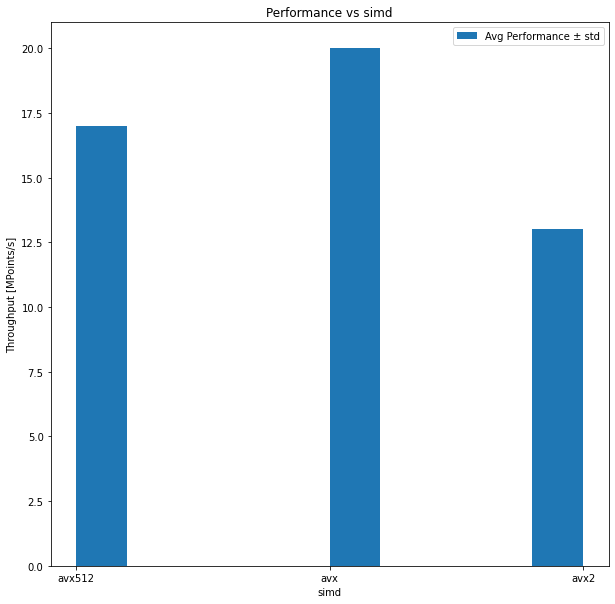

In [134]:
fig_simd = plt.figure(figsize= (10,10))
# plt.errorbar(df_simd['simd'], df_simd['mean'], yerr= df_simd['std'], fmt = 'o',color = 'orange', 
#             ecolor = 'lightgreen', elinewidth = 5, capsize=10)
plt.hist(df_mult['simd'].head(50))
plt.xlabel('simd')
plt.ylabel('Throughput [MPoints/s]')
plt.title('Performance vs simd')
plt.legend(['Avg Performance ± std'])

counter = 0
filename_simd = "./Plots/Plot_Performance_simd_{}.png"


In [ ]:
while os.path.isfile(filename_simd.format(counter)):
    counter += 1
filename_simd = filename_simd.format(counter)
fig_simd.savefig(filename_simd, dpi=100)


## Olevel

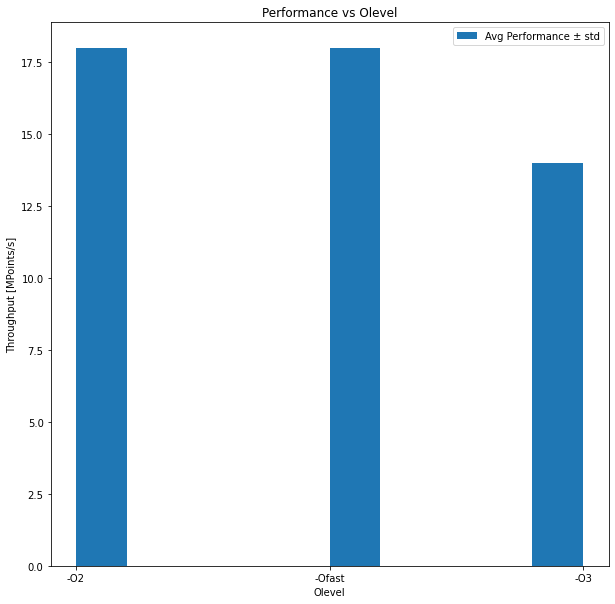

In [135]:
fig_olevel = plt.figure(figsize= (10,10))
# plt.errorbar(df_olevel['Olevel'], df_olevel['mean'], yerr= df_olevel['std'], fmt = 'o',color = 'red', 
#             ecolor = 'blue', elinewidth = 5, capsize=10)
plt.hist(df_mult['Olevel'].head(50))
plt.xlabel('Olevel')
plt.ylabel('Throughput [MPoints/s]')
plt.title('Performance vs Olevel')
plt.legend(['Avg Performance ± std'])

counter = 0
filename_olevel = "./Plots/Plot_Performance_Olevel_{}.png"


In [ ]:
while os.path.isfile(filename_olevel.format(counter)):
    counter += 1
filename_olevel = filename_olevel.format(counter)
fig_olevel.savefig(filename_olevel, dpi=100)


## Block size/Cache size

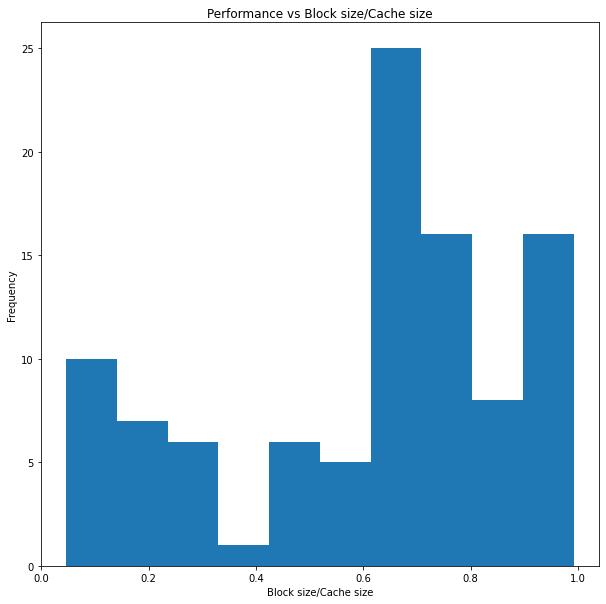

In [155]:
fig_block = plt.figure(figsize= (10,10))
plt.hist(df_block['Block size/Cache'])
# plt.scatter(df_block['Block size/Cache'],df_block['Performance'])
plt.xlabel('Block size/Cache size')
plt.ylabel('Frequency')
plt.title('Performance vs Block size/Cache size')
# plt.legend(['Avg Performance ± std'])

counter = 0
filename_block = "./Plots/Plot_Performance_block_{}.png"


In [156]:
while os.path.isfile(filename_block.format(counter)):
    counter += 1
filename_block = filename_block.format(counter)
fig_block.savefig(filename_block, dpi=100)


## SIMD and Olevel

In [33]:
df_problem = df_mult.groupby('Problem size').get_group(512*512*1024).groupby(['simd','Olevel']).agg({'Performance': ['mean', 'std'] })
# mean()[['Performance']]


In [34]:
df_problem

Performance            
                      mean         std
simd   Olevel                         
avx    -O2     1076.369925  243.231261
       -O3     1079.509420  232.157190
       -Ofast  1085.337091  234.559082
avx2   -O2     1083.268843  235.321641
       -O3     1075.324668  245.084407
       -Ofast  1077.485234  235.630569
avx512 -O2     1074.493746  249.478044
       -O3     1073.823849  250.379652
       -Ofast  1075.922102  247.429232

In [32]:
print(df_problem.to_latex())

\begin{tabular}{llr}
\toprule
       &        &  Performance \\
simd & Olevel &              \\
\midrule
avx & -O2 &  1076.369925 \\
       & -O3 &  1079.509420 \\
       & -Ofast &  1085.337091 \\
avx2 & -O2 &  1083.268843 \\
       & -O3 &  1075.324668 \\
       & -Ofast &  1077.485234 \\
avx512 & -O2 &  1074.493746 \\
       & -O3 &  1073.823849 \\
       & -Ofast &  1075.922102 \\
\bottomrule
\end{tabular}



# With and Without Local Method

In [49]:
pickle_noannealing = "./Results/Run18/Results_final_pickle.pkl"
pickle_annealing = "./Results/Run0/Results_final_pickle.pkl"

with open(pickle_noannealing, 'rb') as handle:
    dict_data = pickle.load(handle)
df_no_annealing = pd.DataFrame.from_dict(dict_data)

with open(pickle_annealing, 'rb') as handle:
    dict_data = pickle.load(handle)
df_with_annealing = pd.DataFrame.from_dict(dict_data)

In [50]:
df_no_annealing['ratio b1/n1'] = df_no_annealing['b1'] /df_no_annealing['n1'] 
df_no_annealing['ratio b2/n2'] = df_no_annealing['b2'] /df_no_annealing['n2']
df_no_annealing['ratio b3/n3'] = df_no_annealing['b3'] /df_no_annealing['n3']

df_no_annealing['Block size/Cache'] = df_no_annealing['b1']*df_no_annealing['b2']*df_no_annealing['b3']*4/11264000

df_no_annealing['cummax'] = df_no_annealing['Performance'].cummax()
# df.sort_values(['Performance'], ascending=[False],inplace=True)


df_with_annealing['ratio b1/n1'] = df_with_annealing['b1'] /df_with_annealing['n1'] 
df_with_annealing['ratio b2/n2'] = df_with_annealing['b2'] /df_with_annealing['n2'] 
df_with_annealing['ratio b3/n3'] = df_with_annealing['b3'] /df_with_annealing['n3'] 

df_with_annealing['Block size/Cache'] = df_with_annealing['b1']*df_with_annealing['b2']*df_with_annealing['b3']*4/11264000

df_with_annealing['cummax'] = df_with_annealing['Performance'].cummax()

In [51]:
def pop_std(x):
    return x.std(ddof=0)

df_stat_no_annealing = df_no_annealing[['Epoch', 'Performance','cummax']].groupby(['Epoch'], as_index=True).agg({'Performance':['mean',pop_std,'min','max'],'cummax':'last'}).reset_index()
df_stat_no_annealing.columns = ['Epoch','Avg Performance', 'Std','min','max','cummax']

df_stat_with_annealing = df_with_annealing[['Epoch', 'Performance','cummax']].groupby(['Epoch'], as_index=True).agg({'Performance':['mean',pop_std,'min','max'],'cummax':'last'}).reset_index()
df_stat_with_annealing.columns = ['Epoch','Avg Performance', 'Std','min','max','cummax']

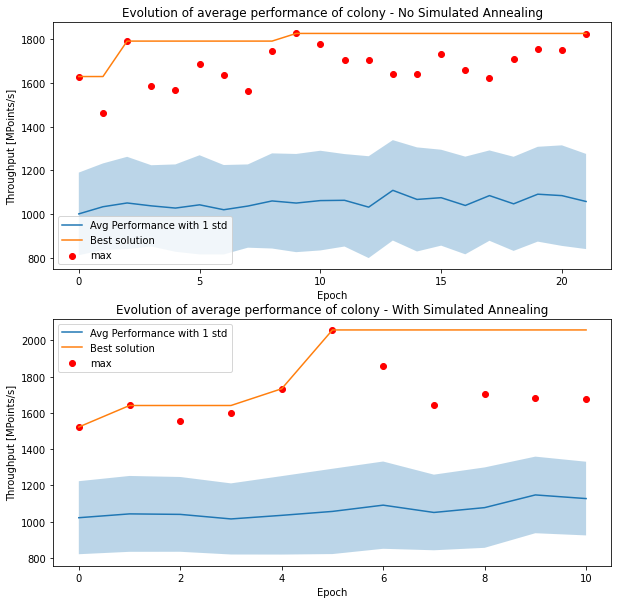

In [58]:
fig4, (ax1, ax2) = plt.subplots(2, 1)
fig4.set_size_inches(10, 10)
ax1.plot(df_stat_no_annealing['Epoch'], df_stat_no_annealing['Avg Performance'])
ax1.plot(df_stat_no_annealing['Epoch'], df_stat_no_annealing['cummax'])
ax1.scatter(df_stat_no_annealing['Epoch'], df_stat_no_annealing['max'], color = 'r')

# ax1.plot(df_stat['Epoch'], df_stat['min'], color = 'r')

ax1.fill_between(df_stat_no_annealing['Epoch'], df_stat_no_annealing['Avg Performance']-1*df_stat_no_annealing['Std'], df_stat_no_annealing['Avg Performance']+1*df_stat_no_annealing['Std'] ,alpha=0.3)
ax1.title.set_text('Evolution of average performance of colony - No Simulated Annealing')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Throughput [MPoints/s]')
# ax1.legend(['Avg Performance with 1 std', 'Best solution','max'])


# ax2.plot(df_stat_with_annealing['Epoch'], df_stat_with_annealing['Avg Performance'])
ax2.plot(df_stat_with_annealing['Epoch'].head(11), df_stat_with_annealing['Avg Performance'].head(11))
ax2.plot(df_stat_with_annealing['Epoch'].head(11), df_stat_with_annealing['cummax'].head(11))
ax2.scatter(df_stat_with_annealing['Epoch'].head(11), df_stat_with_annealing['max'].head(11), color = 'r')

# ax1.plot(df_stat['Epoch'], df_stat['min'], color = 'r')

# ax2.fill_between(df_stat_with_annealing['Epoch'], df_stat_with_annealing['Avg Performance']-1*df_stat_with_annealing['Std'], df_stat_with_annealing['Avg Performance']+1*df_stat_with_annealing['Std'] ,alpha=0.3)
ax2.fill_between(df_stat_with_annealing['Epoch'].head(11), df_stat_with_annealing['Avg Performance'].head(11)-1*df_stat_with_annealing['Std'].head(11), df_stat_with_annealing['Avg Performance'].head(11)+1*df_stat_with_annealing['Std'].head(11) ,alpha=0.3)
ax2.title.set_text('Evolution of average performance of colony - With Simulated Annealing')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Throughput [MPoints/s]')
ax1.legend(['Avg Performance with 1 std', 'Best solution','max'])
ax2.legend(['Avg Performance with 1 std', 'Best solution','max'])



counter = 0
filename_local = "./Plots/Plot_Performance_local_{}.png"

In [59]:
while os.path.isfile(filename_local.format(counter)):
    counter += 1
filename_local = filename_local.format(counter)
fig4.savefig(filename_local, dpi=100)


In [53]:
df_mult.head(10)

,Epoch,Ant,Performance,init,n1,n2,n3,simd,Olevel,num_thread,b1,b2,b3,Run,ratio b1/n1,ratio b2/n2,ratio b3/n3,Problem size,Block size/Cache,cummax
599,5,0.0,2057.32,init,288,992,896,avx512,-O2,16,384,24,158,Run0,1.333333,0.024194,0.176339,255983616,0.517091,2057.32
479,4,0.0,1924.05,init,416,960,992,avx2,-Ofast,16,416,14,172,Run12,1.000000,0.014583,0.173387,396165120,0.355727,1924.05
1199,10,0.0,1899.10,init,352,832,928,avx,-Ofast,16,384,17,238,Run8,1.090909,0.020433,0.256466,271777792,0.551727,1899.10
1079,9,0.0,1887.77,init,320,864,1024,avx2,-O2,16,432,23,173,Run9,1.350000,0.026620,0.168945,283115520,0.610415,1887.77
1199,10,0.0,1886.73,init,416,928,1024,avx512,-O3,16,496,17,197,Run14,1.192308,0.018319,0.192383,395313152,0.589881,1886.73
1079,9,0.0,1875.48,init,320,832,992,avx,-Ofast,16,416,19,256,Run12,1.300000,0.022837,0.258065,264110080,0.718545,1924.05
959,8,0.0,1864.89,init,288,928,736,avx2,-O2,16,512,15,137,Run4,1.777778,0.016164,0.186141,196706304,0.373636,1864.89
719,6,0.0,1857.64,init,384,992,768,avx,-Ofast,16,448,28,209,Run0,1.166667,0.028226,0.272135,292552704,0.931000,2057.32
479,4,0.0,1845.05,init,384,928,896,avx,-O2,16,368,31,188,Run17,0.958333,0.033405,0.209821,319291392,0.761614,1845.05
1079,9,0.0,1841.53,init,352,416,960,avx2,-O3,16,448,13,136,Run1,1.272727,0.031250,0.141667,140574720,0.281273,1841.53


In [127]:
# df_problem_2 = df_mult.groupby('Problem size').get_group(512*512*1024).groupby(['b1','b2','b3']).size().sort_values(ascending=False) #.agg({'Performance': ['mean', 'std'] })
# mean()[['Performance']]
df_problem_2 = df_mult.groupby('Problem size').get_group(512*512*1024)
df_same = df_problem_2.loc[(df_problem_2['b1'] == 480) & (df_problem_2['b2'] == 16) & (df_problem_2['b3'] == 64)]

df_same1 = df_same.groupby(['Olevel','simd']).agg({'Performance': ['mean', 'std'], 'b1': 'first', 'b2': 'first','b3': 'first','n1': 'first', 'n2': 'first','n3': 'first'  })
df_same1.columns = ['Avg Performance', 'std', 'b1','b2', 'b3','n1','n2', 'n3']
# df_same = df_same['Avg Performance'].apply(lambda x: x.sort_values(ascending=False).head(3))
df_same2 = df_same.groupby(['Olevel']).agg({'Performance': ['mean', 'std'], 'b1': 'first', 'b2': 'first','b3': 'first','n1': 'first', 'n2': 'first','n3': 'first'  })#.sort_values(['Avg Performance'], ascending=False)
df_same2.columns = ['Avg Performance', 'std', 'b1','b2', 'b3','n1','n2', 'n3']
df_same2  = df_same2.sort_values(['Avg Performance'], ascending=False)
df_same3 = df_same.groupby(['simd']).agg({'Performance': ['mean', 'std'], 'b1': 'first', 'b2': 'first','b3': 'first','n1': 'first', 'n2': 'first','n3': 'first'  })#.sort_values(['Avg Performance'], ascending=False)
df_same3.columns = ['Avg Performance', 'std', 'b1','b2', 'b3','n1','n2', 'n3']
df_same3 = df_same3.sort_values(['Avg Performance'], ascending=False)
df_same3

,Avg Performance,std,b1,b2,b3,n1,n2,n3
simd,,,,,,,,
avx2,1326.283485,50.117160,480,16,64,512,512,1024
avx,1310.694697,51.209084,480,16,64,512,512,1024
avx512,1305.303509,43.213747,480,16,64,512,512,1024


In [128]:
df_same2

,Avg Performance,std,b1,b2,b3,n1,n2,n3
Olevel,,,,,,,,
-Ofast,1319.116316,49.848339,480,16,64,512,512,1024
-O3,1315.311143,50.319637,480,16,64,512,512,1024
-O2,1309.378226,47.301163,480,16,64,512,512,1024


In [153]:
print(df_same1.to_latex())

\begin{tabular}{llrrrrrrrr}
\toprule
       &        &  Avg Performance &        std &   b1 &  b2 &  b3 &   n1 &   n2 &    n3 \\
Olevel & simd &                  &            &      &     &     &      &      &       \\
\midrule
-O2 & avx &      1313.532632 &  38.473632 &  480 &  16 &  64 &  512 &  512 &  1024 \\
       & avx2 &      1323.924583 &  50.651649 &  480 &  16 &  64 &  512 &  512 &  1024 \\
       & avx512 &      1286.849474 &  44.584057 &  480 &  16 &  64 &  512 &  512 &  1024 \\
-O3 & avx &      1308.392000 &  53.768689 &  480 &  16 &  64 &  512 &  512 &  1024 \\
       & avx2 &      1328.576111 &  57.783084 &  480 &  16 &  64 &  512 &  512 &  1024 \\
       & avx512 &      1313.893182 &  37.456438 &  480 &  16 &  64 &  512 &  512 &  1024 \\
-Ofast & avx &      1311.586471 &  61.054996 &  480 &  16 &  64 &  512 &  512 &  1024 \\
       & avx2 &      1326.922917 &  45.327245 &  480 &  16 &  64 &  512 &  512 &  1024 \\
       & avx512 &      1315.406875 &  44.427514 &  480 & 

In [168]:
df_problem_3 = df_mult.groupby(['simd','Olevel']).get_group(('avx512', '-O3'))
# print(df_problem_3[['simd','Olevel','Performance']].head(10))
# print(df_problem_3[['simd','Olevel','Performance']].tail(10).mean())
df_problem_3[['simd','Olevel','Performance','ratio b1/n1','ratio b2/n2','ratio b3/n3']].head(10).groupby(['simd','Olevel']).mean()



,,Performance,ratio b1/n1,ratio b2/n2,ratio b3/n3
simd,Olevel,,,,
avx512,-O3,1786.513,1.207183,0.02357,0.201553


In [170]:
print(df_problem_3[['simd','Olevel','Performance','ratio b1/n1','ratio b2/n2','ratio b3/n3']].head(10).groupby(['simd','Olevel']).mean().to_latex())

\begin{tabular}{llrrrr}
\toprule
       &     &  Performance &  ratio b1/n1 &  ratio b2/n2 &  ratio b3/n3 \\
simd & Olevel &              &              &              &              \\
\midrule
avx512 & -O3 &     1786.513 &     1.207183 &      0.02357 &     0.201553 \\
\bottomrule
\end{tabular}



In [169]:
df_problem_3[['simd','Olevel','Performance','ratio b1/n1','ratio b2/n2','ratio b3/n3']].tail(10).groupby(['simd','Olevel']).mean()

,,Performance,ratio b1/n1,ratio b2/n2,ratio b3/n3
simd,Olevel,,,,
avx512,-O3,345.72,0.046875,0.65,0.432812


In [171]:
print(df_problem_3[['simd','Olevel','Performance','ratio b1/n1','ratio b2/n2','ratio b3/n3']].tail(10).groupby(['simd','Olevel']).mean().to_latex())

\begin{tabular}{llrrrr}
\toprule
       &     &  Performance &  ratio b1/n1 &  ratio b2/n2 &  ratio b3/n3 \\
simd & Olevel &              &              &              &              \\
\midrule
avx512 & -O3 &       345.72 &     0.046875 &         0.65 &     0.432812 \\
\bottomrule
\end{tabular}

